 # processing.minmaxscaler

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = [[-1,2],[-0.5,6],[0,10],[1,18]]

In [5]:
data

[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [6]:
import pandas as pd
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [7]:
#实现归一化
scaler = MinMaxScaler()
scaler = scaler.fit(data)
result = scaler.transform(data)

In [8]:
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [9]:
result_ = scaler.fit_transform(data)

In [10]:
scaler.inverse_transform(result)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [11]:
# 使用MinMaxScaler 的参数feature_range实现将数据归一化到[0,1]以外的范围中
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler(feature_range=[5,10])
scaler.fit_transform(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [12]:
#使用numpy来实现归一化
import numpy as np
x = np.array([[-1,2],[-0.5,6],[0,10],[1,18]])
#归一化
x_nor = (x - x.min(axis=0)/(x.max(axis=0) - x.min(axis=0)))
x_nor

array([[-0.5  ,  1.875],
       [ 0.   ,  5.875],
       [ 0.5  ,  9.875],
       [ 1.5  , 17.875]])

In [13]:
#逆转归一化
x_returned =x_nor *(x.max(axis=0) - x.min(axis=0)) + x.min(axis=0)

In [14]:
x_returned

array([[ -2.,  32.],
       [ -1.,  96.],
       [  0., 160.],
       [  2., 288.]])

# preprocessng.StandardScaler

In [15]:
# x1 = (x-均值)/标准差

In [19]:
from sklearn.preprocessing import StandardScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
ss = StandardScaler()
x_std = ss.fit_transform(data)

In [17]:
ss.mean_

array([-0.125,  9.   ])

In [18]:
ss.var_

array([ 0.546875, 35.      ])

In [20]:
x_std.mean()
x_std.std()

1.0

In [21]:
ss.inverse_transform(x_std)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

# 2.2 缺失值

In [25]:
import pandas as pd
data = pd.read_csv('./Narrativedata.csv',index_col=0)# 第0列作为索引

In [30]:
data.head()

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


In [34]:
data.count(axis =0)/len(data)

Age         0.801347
Sex         1.000000
Embarked    0.997755
Survived    1.000000
dtype: float64

# impute.SimpleImputer

In [46]:
Age = data.loc[:,'Age'].values.reshape(-1,1)#sklearn中特征矩阵必须是二维

In [55]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()
imp_median = SimpleImputer(strategy='median')
imp_0 = SimpleImputer(strategy='constant',fill_value=0)

In [56]:
imp_mean = imp_mean.fit_transform(Age)
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)

In [57]:
data.loc[:,'Age'] = imp_median

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [59]:
#使用众数填补embarked
Embarked = data.loc[:,'Embarked'].values.reshape(-1,1)

In [60]:
imp_mode = SimpleImputer(strategy = 'most_frequent')
data.loc[:,'Embarked'] = imp_mode.fit_transform(Embarked)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [61]:
import pandas as pd
data = pd.read_csv('./Narrativedata.csv',index_col=0)# 第0列作为索引

data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [62]:
data.loc[:,'Age'] = data.loc[:,'Age'].fillna(data.loc[:,'Age'].median())

In [63]:
data.dropna(axis=0,inplace=True)

# 2.3 处理分类型特征：编码与哑变量

# preprocessing.LabelEncoder 标签专用，能够将分类转换为数值

In [65]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1]
le = LabelEncoder()
le = le.fit(y)
label = le.transform(y)

le.classes_
label

le.fit_transform(y)

le.inverse_transform(label)


array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No', 'Unknown',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Unknown', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'No', 'Ye

In [68]:
label

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

# preprocessing.OrdinalEncoder:特征专用，能够将分类特征转换为分类数值

In [70]:
from sklearn.preprocessing import OrdinalEncoder
data_ = data.copy()
data_.head()
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [71]:
data.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])

data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


# preprocessing.OneHotEncoder :独热编码，创建哑变量

In [78]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,No
1,38.0,0.0,0.0,Yes
2,26.0,0.0,2.0,Yes
3,35.0,0.0,2.0,Yes
4,35.0,1.0,2.0,No


In [79]:
from sklearn.preprocessing import OneHotEncoder
x = data.iloc[:,1:-1]
enc = OneHotEncoder(categories='auto').fit(x)

In [83]:
result = enc.transform(x).toarray()

In [84]:
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [86]:
data['Embarked'].value_counts()

Embarked
2.0    644
0.0    168
1.0     77
Name: count, dtype: int64

In [87]:
#还原数据
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
884,1.0,2.0
885,0.0,2.0
886,0.0,2.0
887,1.0,0.0


In [90]:
enc.get_feature_names_out()

array(['Sex_0.0', 'Sex_1.0', 'Embarked_0.0', 'Embarked_1.0',
       'Embarked_2.0'], dtype=object)

In [91]:
result.shape

(889, 5)

In [92]:
# axis=1，从左到右的变化，axis=0,表示从上到下的变化
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)

In [93]:
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,1.0,2.0,No,0.0,1.0,0.0,0.0,1.0
1,38.0,0.0,0.0,Yes,1.0,0.0,1.0,0.0,0.0
2,26.0,0.0,2.0,Yes,1.0,0.0,0.0,0.0,1.0
3,35.0,0.0,2.0,Yes,1.0,0.0,0.0,0.0,1.0
4,35.0,1.0,2.0,No,0.0,1.0,0.0,0.0,1.0


In [95]:
newdata.drop(labels=['Embarked','Sex'],inplace=True,axis=1)

In [96]:
newdata

,Age,Survived,0,1,2,3,4
0,22.0,No,0.0,1.0,0.0,0.0,1.0
1,38.0,Yes,1.0,0.0,1.0,0.0,0.0
2,26.0,Yes,1.0,0.0,0.0,0.0,1.0
3,35.0,Yes,1.0,0.0,0.0,0.0,1.0
4,35.0,No,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
888,28.0,No,0.0,1.0,0.0,1.0,0.0
889,26.0,Unknown,NaN,NaN,NaN,NaN,NaN
890,32.0,No,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,0.0,1.0,0.0,0.0,1.0


In [97]:
newdata.columns =['Age','Survived','Female','Male','Embarked_C','Embarked_Q','Embarked_S']

In [98]:
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,No,0.0,1.0,0.0,0.0,1.0
1,38.0,Yes,1.0,0.0,1.0,0.0,0.0
2,26.0,Yes,1.0,0.0,0.0,0.0,1.0
3,35.0,Yes,1.0,0.0,0.0,0.0,1.0
4,35.0,No,0.0,1.0,0.0,0.0,1.0


# 2.4处理连续型特征：二值化与分段

# sklearn.preprocessing.Binarizer

In [101]:
# 将年龄二值化
data_2 = data.copy()

from sklearn.preprocessing import Binarizer
data_2.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,No
1,38.0,0.0,0.0,Yes
2,26.0,0.0,2.0,Yes
3,35.0,0.0,2.0,Yes
4,35.0,1.0,2.0,No


In [104]:
x = data_2.iloc[:,0].values.reshape(-1,1)#处理特征的类不能是一维数组

In [106]:
transformer = Binarizer(threshold=30).fit_transform(x)

In [107]:
transformer

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

# preprocessing.KBinsDiscretizer

In [113]:
from sklearn.preprocessing import KBinsDiscretizer

x = data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
result1 = est.fit_transform(x)

In [117]:
set(result1.ravel())

{0.0, 1.0, 2.0}

# 3特征选择

In [128]:
import pandas as pd
data = pd.read_csv('./digit recognizor.csv')

In [129]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
y = data.iloc[:,0]
x = data.iloc[:,1:]

In [131]:
x.shape

(42000, 784)

# 3.1 Filter过滤法

In [133]:
x_desc = x.describe().T

In [134]:
x_desc

,count,mean,std,min,25%,50%,75%,max
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel4,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel779,42000.0,0.002857,0.414264,0.0,0.0,0.0,0.0,62.0
pixel780,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [141]:
column = x_desc[x_desc['std']!=0].index
len(column)

708

# VarianceThreshold

In [143]:
from sklearn.feature_selection import VarianceThreshold

In [144]:
selector = VarianceThreshold()
x_var0 = selector.fit_transform(x)

In [145]:
x_var0.shape

(42000, 708)

In [147]:
x.var().values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00, 1.60530842e+00, 9.29377602e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [150]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
# 设定方差中位数作为阈值
import numpy as np
x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)

In [149]:
x_fsvar

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  74, 250,  59]], dtype=int64)

# 方差过滤对模型的影响

# 1.导入模块并准备数据

In [151]:
# knn vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)

In [ ]:
# knn方差过滤前
%%timeit
cross_val_score(KNN(),x,y,cv=5).mean()

# 3.1.2 相关性过滤

## 3.1.2.1 卡方过滤

In [153]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [154]:
x_fschi = SelectKBest(chi2,k=300).fit_transform(x_fsvar,y)

In [155]:
x_fschi.shape

(42000, 300)

## 3.1.2.2 选取超参数k

In [ ]:
%matplot inline
import matplotlib.pyplot as plt
score =[]
for i in range(390,200,-10):
    x_fschi = SelectKBest(chi2,k=i).fit_transform(x_fsvar,y)
    once = cross_val_score(rfc(n_estimators=10,random_state=0),x_fschi,y,cv=5)
    score.append(once)
plt.plot(range(350,200,-10),score)
plt.show()

## 3.1.2.3 F检验

In [157]:
from sklearn.feature_selection import f_classif
F,pvalues_f = f_classif(x_fsvar,y)
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [158]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [160]:
k = F.shape[0] - (pvalues_f > 0.05).sum()

In [161]:
k

392

## 3.1.2.4 互信息法

In [162]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [163]:
result = MIC(x_fsvar,y)

In [164]:
k = result.shape[0] - sum(result <=0)

# 3.2 EMbedded  嵌入法

In [166]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_ = RFC(n_estimators=10,random_state=0)
x_embedde = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)

In [167]:
x_embedde.shape

(42000, 47)

In [168]:
RFC_.fit(x,y).feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.96726660e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.39623410e-06,
       7.35101726e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.70425050e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.09114204e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [170]:
threshold = np.linspace(0,RFC_.fit(x,y).feature_importances_.max(),20)

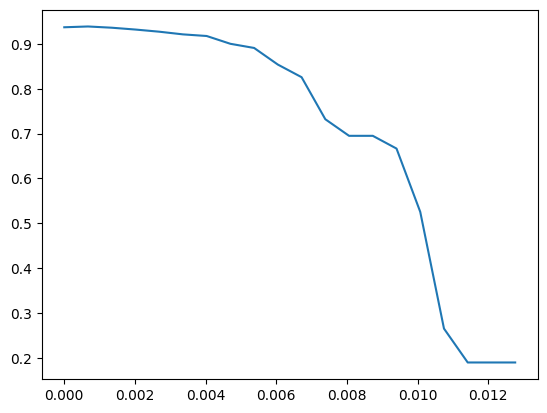

In [172]:
import matplotlib.pyplot as plt
score = []
for i in threshold:
    x_embedde = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedde,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

# 3.3 Wrapper包装法

In [173]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=340,step=50).fit(x,y)

selector.support_.sum()

340

In [ ]:
selector.ranking_

In [174]:
x_wrapper = selector.transform(x)
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.9379761904761905